<div style="text-align: center; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(242, 64, 10);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
    Import Libraries
  </span>
</div>
<a id="import-data"></a>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy  as sc
import math
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(242, 64, 10);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
    Import Dataset
  </span>
</div>
<a id="import-data"></a>


In [3]:
path = r"../data/split/train.csv"
df=pd.read_csv(path)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,...,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,...,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,...,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,...,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,...,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [5]:
df.shape

(170884, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

<div style="text-align: center; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(242, 64, 10);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
    Missing and duplicate values
  </span>
</div>
<a id="import-data"></a>


In [7]:
df.isna().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.duplicated().sum()


np.int64(448)

In [9]:
df.drop_duplicates(inplace=True)


<div style="text-align: center; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(242, 64, 10);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
    Descriptive Statistics
  </span>
</div>
<a id="import-data"></a>


In [10]:
descriptive_df = df.drop(columns=['Time' ,'Class'])

In [11]:
descriptive_df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,170436.0,0.003016,1.951034,-46.855047,-0.919288,0.018437,1.316771,2.451888
V2,170436.0,-0.003764,1.646755,-63.344698,-0.600188,0.064566,0.799875,22.057729
V3,170436.0,-0.001770,1.516106,-48.325589,-0.896354,0.177007,1.028136,4.226108
V4,170436.0,-0.004885,1.415351,-5.683171,-0.850234,-0.022444,0.735256,16.875344
V5,170436.0,0.001359,1.391759,-113.743307,-0.690660,-0.053562,0.612154,34.099309
V6,170436.0,-0.000109,1.337909,-23.496714,-0.769441,-0.274847,0.399075,73.301626
V7,170436.0,0.000715,1.251332,-43.557242,-0.553610,0.040934,0.569308,120.589494
V8,170436.0,-0.002095,1.191566,-73.216718,-0.209678,0.021147,0.325010,18.282168
V9,170436.0,-0.001676,1.096377,-13.434066,-0.642834,-0.052595,0.594459,10.392889
V10,170436.0,-0.001998,1.077737,-24.588262,-0.537298,-0.094642,0.450581,15.331742


<div style="text-align: center; margin: 30px 0;">
  <span style="
    font-family: 'Playfair Display', serif;
    background-color:rgb(242, 64, 10);
    color: white;
    font-size: 1.5em;
    font-weight: 600;
    font-style: italic;
    padding: 12px 24px;
    border-radius: 12px;
    display: inline-block;
    box-shadow: 0 4px 12px rgba(18, 17, 17, 0.15);
    transition: transform 0.2s ease, box-shadow 0.2s ease;
    cursor: default;
  " 
  onmouseover="this.style.transform='scale(1.03)'; this.style.boxShadow='0 6px 16px rgba(0,0,0,0.2)'"
  onmouseout="this.style.transform='scale(1)'; this.style.boxShadow='0 4px 12px rgba(0,0,0,0.15)'"
  >
    Histograms
  </span>
</div>
<a id="import-data"></a>


In [12]:
numeric_cols=[i for i in df.columns.tolist() if i not in ['Time' ,'Class']]


In [13]:


def show_histograms_sns(df, cols=3, bins=None, show_kde=True, main_title="Histograms Overview"):
    # Set style first
    plt.style.use('dark_background')
    sns.set_style("darkgrid")
    
    n = len(df.columns)
    rows = math.ceil(n / cols)
    
    # Create figure with more space for titles
    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*6))  
    
    # Handle single subplot case
    if n == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes if n > 1 else [axes]
    else:
        axes = axes.flatten()
    
    palette = sns.color_palette("Set2", n_colors=n)
    
    for i, col in enumerate(df.columns):
        ax = axes[i]
        data = df[col].dropna()
        
        # Determine bins
        nbins = bins[col] if isinstance(bins, dict) and col in bins else bins if bins else 10
        
        if np.issubdtype(df[col].dtype, np.number):
            sns.histplot(data, bins=nbins, kde=show_kde, color=palette[i], 
                        edgecolor='white', linewidth=1.2, alpha=0.8, ax=ax)
        else:
            sns.countplot(x=data, palette=palette, order=data.value_counts().index, ax=ax)
        
        # Title for each subplot - with more padding
        ax.set_title(col, fontsize=16, weight='bold', color='white', pad=25)
        
        # Axes labels
        ax.set_xlabel(col, fontsize=12, color='white', labelpad=10)
        ax.set_ylabel('Count', fontsize=12, color='white', labelpad=10)
        
        # Tick labels
        ax.tick_params(axis='x', colors='white', rotation=45, labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        # Spine color
        for spine in ax.spines.values():
            spine.set_color('white')
            spine.set_linewidth(1)
    
    # Remove empty subplots
    for j in range(n, len(axes)):
        fig.delaxes(axes[j])
    
    # Main title with proper positioning
    fig.suptitle(main_title, fontsize=24, weight='bold', color='white', y=0.98)
    
    # Better layout adjustment
    plt.tight_layout(rect=[0, 0, 1, 0.94])  
    
    # Force rendering
    plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
    
    plt.show()



In [14]:
# Alternative function with explicit matplotlib approach
def show_histograms_matplotlib(df, cols=3, bins=None, show_kde=True, main_title="Histograms Overview"):
    
    plt.style.use('dark_background')
    
    n = len(df.columns)
    rows = math.ceil(n / cols)
    
    # Enhanced color palettes
    vibrant_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
                      '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9']
    
    gradient_colors = ['#667eea', '#764ba2', '#f093fb', '#f5576c', '#4facfe', 
                       '#00f2fe', '#43e97b', '#38f9d7', '#ffecd2', '#fcb69f']
    
    neon_colors = ['#ff0080', '#00ffff', '#ff8000', '#8000ff', '#00ff40', 
                   '#ff4080', '#40ff80', '#8040ff', '#ff8040', '#4080ff']
    
    # Choose color scheme based on number of plots
    if n <= 5:
        colors = vibrant_colors[:n]
    elif n <= 10:
        colors = gradient_colors[:n]
    else:
        colors = neon_colors * (n // len(neon_colors) + 1)
    
    # Enhanced background gradient
    fig = plt.figure(figsize=(cols*6, rows*6))
    fig.patch.set_facecolor('#0a0a0a')  # Very dark background
    
    for i, col in enumerate(df.columns, 1):
        ax = fig.add_subplot(rows, cols, i)
        
        data = df[col].dropna()
        nbins = bins[col] if isinstance(bins, dict) and col in bins else bins if bins else 10
        
        # Enhanced histogram with gradient effect
        main_color = colors[i-1]
        
        # Create gradient effect
        n_bins_actual = nbins if isinstance(nbins, int) else len(np.histogram(data, bins=nbins)[1]) - 1
        gradient_colors_hist = []
        
        # Generate gradient colors for each bin
        from matplotlib.colors import to_rgb
        base_rgb = to_rgb(main_color)
        for j in range(n_bins_actual):
            alpha_factor = 0.6 + 0.4 * (j / n_bins_actual)  # Gradient alpha
            gradient_colors_hist.append((*base_rgb, alpha_factor))
        
        # Plot histogram with improved styling
        n_hist, bins_hist, patches = ax.hist(data, bins=nbins, alpha=0.85, 
                                            color=main_color, 
                                            edgecolor='white', linewidth=1.5,
                                            rwidth=0.9)
        
        # Apply gradient to bars
        for j, patch in enumerate(patches):
            if j < len(gradient_colors_hist):
                patch.set_facecolor(gradient_colors_hist[j])
            patch.set_edgecolor('white')
            patch.set_linewidth(1.2)
        
        # Enhanced KDE with complementary colors
        if show_kde and np.issubdtype(df[col].dtype, np.number) and len(data) > 1:
            from scipy import stats
            kde_data = np.linspace(data.min(), data.max(), 200)
            kde = stats.gaussian_kde(data)
            ax2 = ax.twinx()
            
            # Complementary color for KDE
            kde_color = '#FFD700' if main_color in ['#667eea', '#764ba2'] else '#FF69B4'
            
            ax2.plot(kde_data, kde(kde_data), color=kde_color, 
                    alpha=0.9, linewidth=3, linestyle='-')
            ax2.fill_between(kde_data, kde(kde_data), alpha=0.2, color=kde_color)
            
            ax2.set_ylabel('Density', color='#E8E8E8', fontsize=11, fontweight='bold')
            ax2.tick_params(axis='y', colors='#E8E8E8', labelsize=9)
            ax2.spines['right'].set_color('#E8E8E8')
            ax2.spines['right'].set_linewidth(1.5)
        
        # Enhanced styling with better contrast
        ax.set_title(col, fontsize=16, weight='bold', color='#FFFFFF', 
                    pad=25, bbox=dict(boxstyle="round,pad=0.3", 
                                     facecolor=main_color, alpha=0.3))
        
        ax.set_xlabel(col, fontsize=12, color='#E8E8E8', labelpad=10, fontweight='bold')
        ax.set_ylabel('Count', fontsize=12, color='#E8E8E8', labelpad=10, fontweight='bold')
        ax.tick_params(colors='#CCCCCC', labelsize=10)
        
        # Enhanced grid
        ax.grid(True, alpha=0.3, color='#404040', linestyle='--', linewidth=0.8)
        
        # Improved spines
        for spine_name, spine in ax.spines.items():
            if spine_name in ['top', 'right']:
                spine.set_visible(False)
            else:
                spine.set_color('#E8E8E8')
                spine.set_linewidth(1.5)
        
        # Dark gradient background for each subplot
        ax.set_facecolor('#1a1a1a')
    
    # Enhanced main title with shadow effect
    fig.suptitle(main_title, fontsize=26, weight='bold', color='#FFFFFF', 
                y=0.96, bbox=dict(boxstyle="round,pad=0.5", 
                                 facecolor='#2a2a2a', alpha=0.8))
    
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()



In [15]:
# Color scheme options - add at the beginning of file
def get_color_scheme(scheme_name='vibrant', n_colors=10):
    color_schemes = {
        'vibrant': ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
                   '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9'],
        
        'neon': ['#FF073A', '#00F5FF', '#FF8C00', '#9400D3', '#32CD32',
                '#FF1493', '#00FF7F', '#8A2BE2', '#FF4500', '#1E90FF'],
        
        'sunset': ['#FF5722', '#FF9800', '#FFC107', '#FFEB3B', '#CDDC39',
                  '#8BC34A', '#4CAF50', '#009688', '#00BCD4', '#03A9F4'],
        
        'ocean': ['#0077BE', '#00A8CC', '#00D4AA', '#7FDBDA', '#B8E6B8',
                 '#F9E79F', '#F8C471', '#F1948A', '#D7BDE2', '#AED6F1'],
        
        'cyberpunk': ['#00FFFF', '#FF00FF', '#FFFF00', '#00FF00', '#FF0080',
                     '#8000FF', '#FF8000', '#0080FF', '#80FF00', '#FF0040']
    }
    
    colors = color_schemes.get(scheme_name, color_schemes['vibrant'])
    return colors * (n_colors // len(colors) + 1)  # Repeat if needed



In [16]:
def show_histograms_premium(df, cols=3, bins=None, show_kde=True, 
                           main_title="Histograms Overview", color_scheme='vibrant'):
    
    plt.style.use('dark_background')
    
    n = len(df.columns)
    rows = math.ceil(n / cols)
    colors = get_color_scheme(color_scheme, n)
    
    # Create figure with better background
    fig = plt.figure(figsize=(cols*6.5, rows*6))
    fig.patch.set_facecolor('#0a0a0a')
    
    for i, col in enumerate(df.columns, 1):
        ax = fig.add_subplot(rows, cols, i)
        
        data = df[col].dropna()
        nbins = bins[col] if isinstance(bins, dict) and col in bins else bins if bins else 'auto'
        main_color = colors[i-1]
        
        # Enhanced histogram with 3D-like effect
        n_hist, bins_hist, patches = ax.hist(data, bins=nbins, alpha=0.8, 
                                            color=main_color, edgecolor='white', 
                                            linewidth=1.8, rwidth=0.85)
        
        # Add glow effect to bars
        for j, patch in enumerate(patches):
            # Gradient within each bar
            height = patch.get_height()
            if height > 0:
                # Add inner shadow/highlight
                from matplotlib.colors import to_rgba
                base_color = to_rgba(main_color)
                lighter = (*base_color[:3], base_color[3] * 0.6)
                darker = (*[c*0.7 for c in base_color[:3]], base_color[3])
                patch.set_facecolor(main_color)
                patch.set_edgecolor('#F0F0F0')
                patch.set_linewidth(1.5)
        
        # Stylish KDE with area fill
        if show_kde and np.issubdtype(df[col].dtype, np.number) and len(data) > 1:
            from scipy import stats
            kde_data = np.linspace(data.min(), data.max(), 300)
            kde = stats.gaussian_kde(data)
            kde_values = kde(kde_data)
            
            ax2 = ax.twinx()
            
            # Multi-layer KDE for depth
            ax2.plot(kde_data, kde_values, color='#FFD700', 
                    alpha=1.0, linewidth=4, linestyle='-', zorder=5)
            ax2.plot(kde_data, kde_values, color='white', 
                    alpha=0.8, linewidth=2, linestyle='-', zorder=6)
            
            # Gradient fill under KDE
            ax2.fill_between(kde_data, kde_values, alpha=0.15, color='#FFD700')
            
            # Style KDE axis
            ax2.set_ylabel('Density', color='#FFD700', fontsize=11, 
                          fontweight='bold', rotation=270, labelpad=20)
            ax2.tick_params(axis='y', colors='#FFD700', labelsize=9)
            ax2.spines['right'].set_color('#FFD700')
            ax2.spines['right'].set_linewidth(2)
        
        # Premium title styling
        title_color = main_color
        ax.set_title(col, fontsize=17, weight='bold', color='white', pad=25,
                    bbox=dict(boxstyle="round,pad=0.4", 
                             facecolor=title_color, alpha=0.2,
                             edgecolor=title_color, linewidth=2))
        
        # Enhanced labels and ticks
        ax.set_xlabel(col, fontsize=12, color='#E0E0E0', 
                     labelpad=12, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=12, color='#E0E0E0', 
                     labelpad=12, fontweight='bold')
        
        # Gradient background
        ax.set_facecolor('#151515')
        
        # Custom grid
        ax.grid(True, alpha=0.25, color='#505050', linestyle=':', linewidth=1)
        
        # Modern spines
        for spine_name, spine in ax.spines.items():
            if spine_name in ['top']:
                spine.set_visible(False)
            elif spine_name == 'right' and not (show_kde and np.issubdtype(df[col].dtype, np.number)):
                spine.set_visible(False)
            else:
                spine.set_color('#C0C0C0')
                spine.set_linewidth(1.8)
        
        # Enhanced tick styling
        ax.tick_params(colors='#D0D0D0', labelsize=10, width=1.5)
        
        # Add subtle statistics text
        mean_val = data.mean() if np.issubdtype(df[col].dtype, np.number) else None
        if mean_val is not None:
            ax.text(0.02, 0.98, f'μ = {mean_val:.2f}', 
                   transform=ax.transAxes, fontsize=10, color='#A0A0A0',
                   verticalalignment='top', 
                   bbox=dict(boxstyle="round,pad=0.3", 
                            facecolor='black', alpha=0.7))
    
    # Spectacular main title
    fig.suptitle(main_title, fontsize=28, weight='bold', color='white', y=0.97,
                bbox=dict(boxstyle="round,pad=0.6", 
                         facecolor='#1a1a1a', alpha=0.9,
                         edgecolor='#4A4A4A', linewidth=2))
    
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()



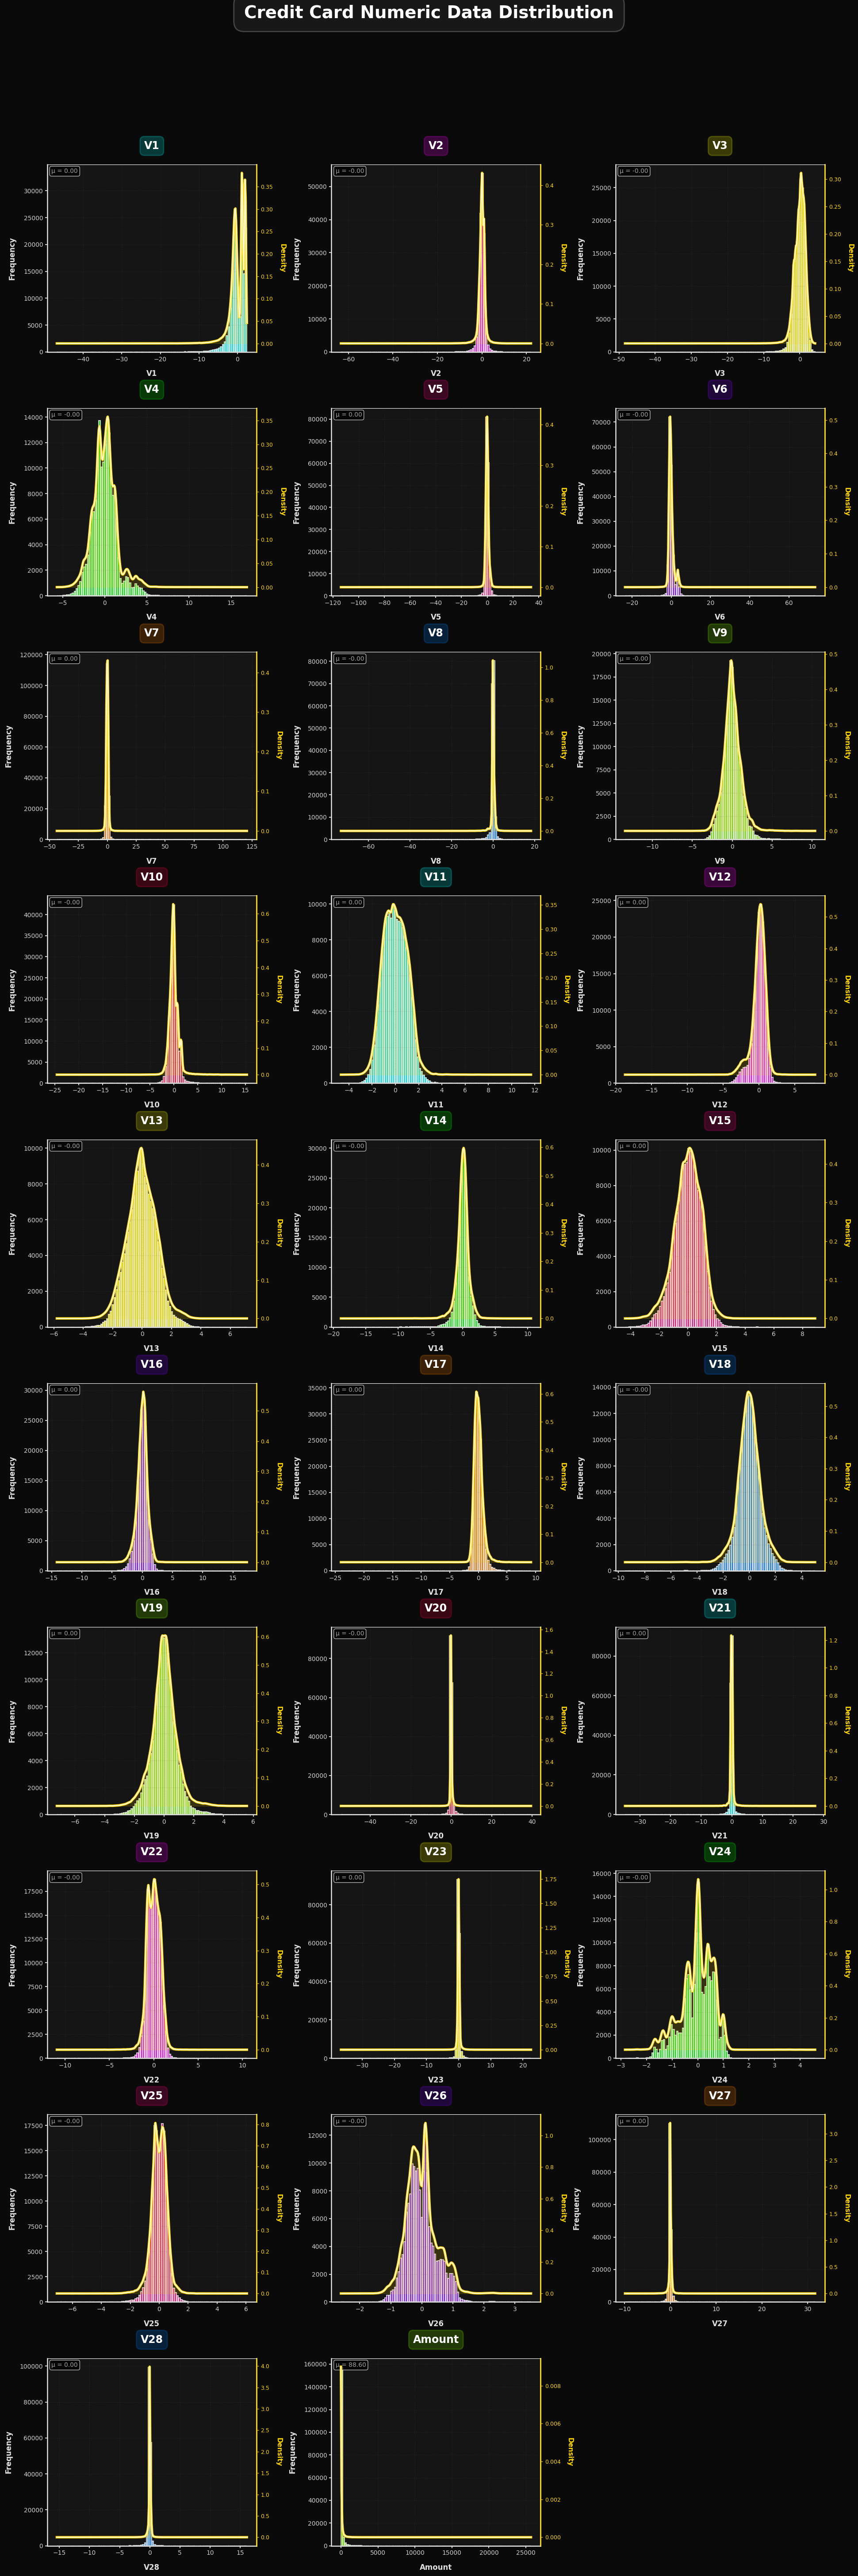

In [17]:
show_histograms_premium(df[numeric_cols], cols=3, bins=100, show_kde=True, 
                       main_title="Credit Card Numeric Data Distribution",
                       color_scheme='cyberpunk') 

In [20]:
df.to_csv(r'../data/cleaned_train.csv', index=False)